<a href="https://colab.research.google.com/github/VasavSrivastava/MAT421/blob/main/Hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.1 Introduction**  

Linear algebra is a fundamental branch of mathematics widely applied across various disciplines, especially in **data science** and **machine learning**. It provides the foundation for many algorithms and techniques, making a strong understanding of its concepts essential for deeper insights into these fields.  

Key topics in **linear algebra** are particularly useful in data science, including **vector spaces**, **orthogonality**, **eigenvalues**, and **matrix decomposition**. Additionally, it covers applications such as **linear regression** and **principal component analysis (PCA)**, where linear algebra plays a crucial role in solving complex data science problems.  

For more advanced topics and applications of linear algebra, various references provide further insights into its significance in computational fields.  



#**1.2 Elements of Linear Algebra**

### 1.2.1 Linear Spaces

A **linear combination** of vectors is formed by multiplying each vector by a scalar and summing the results. The **span** of a set of vectors consists of all possible linear combinations. The set of all vectors that can be expressed as a linear combination of a given set forms a **linear subspace**.

A **basis** of a subspace is a set of linearly independent vectors that span the subspace. The number of vectors in a basis defines the **dimension** of the subspace.

For a matrix $A$ with column vectors $a_1, a_2, ..., a_m$, the **column space** is given by:

$ \text{col}(A) = \text{span}(a_1, a_2, ..., a_m) $

A set of vectors $\{u_1, u_2, ..., u_m\}$ is **linearly independent** if:

$ \sum_{j=1}^{m} \alpha_j u_j = 0 \quad \Rightarrow \quad \alpha_j = 0, \quad \forall j $

Otherwise, they are **linearly dependent**.

### 1.2.2 Orthogonality  

The **inner product** of two vectors $u$ and $v$ is:

$ \langle u, v \rangle = \sum_{i=1}^{n} u_i v_i $

The **norm** of a vector is:

$ \| u \| = \sqrt{\sum_{i=1}^{n} u_i^2} $

A set of vectors $\{u_1, u_2, ..., u_m\}$ is **orthonormal** if:

$ \langle u_i, u_j \rangle = 0 \quad \text{for } i \neq j, \quad \| u_i \| = 1 $

### 1.2.3 Gram-Schmidt Process  

The **Gram-Schmidt** algorithm converts a set of linearly independent vectors into an **orthonormal basis** using:

$ q_i = \frac{a_i - \text{Proj}_{U_{i-1}}(a_i)}{\| a_i - \text{Proj}_{U_{i-1}}(a_i) \|} $

where:

$ \text{Proj}_{U_{i-1}}(a_i) = \sum_{j=1}^{i-1} \langle a_i, q_j \rangle q_j $

### 1.2.4 Eigenvalues and Eigenvectors  

A scalar $\lambda$ is an **eigenvalue** of a square matrix $A$ if there exists a nonzero vector $x$ such that:

$ Ax = \lambda x $

A matrix is **diagonalizable** if it can be written as:

$ A = P D P^{-1} $

where $D$ is a diagonal matrix of eigenvalues and $P$ contains the corresponding eigenvectors.

For a **symmetric matrix** $A$, eigenvectors corresponding to distinct eigenvalues are **orthogonal**.

### 1.2.5 Best Approximation and Projections  

The **orthogonal projection** of a vector $v$ onto a subspace spanned by an orthonormal set $\{q_1, ..., q_m\}$ is:

$ P_U v = \sum_{j=1}^{m} \langle v, q_j \rangle q_j $

For any $u$ in the subspace $U$, the approximation satisfies:

$ \| v - P_U v \| \leq \| v - u \| $

### 1.2.6 Constrained Optimization  

The **Rayleigh quotient** is used to find the largest and smallest eigenvalues of a symmetric matrix $A$:

$ \frac{x^T A x}{x^T x} $

This quotient is maximized by the largest eigenvalue and minimized by the smallest eigenvalue.


In [3]:
import numpy as np

# Gram-Schmidt Process
def gram_schmidt(A):
    """ Perform Gram-Schmidt orthonormalization on matrix A """
    A = A.astype(np.float64)  # Ensure float type for calculations
    Q = np.zeros_like(A, dtype=np.float64)

    for i in range(A.shape[1]):
        q = A[:, i].astype(np.float64)  # Ensure float dtype
        for j in range(i):
            q -= np.dot(Q[:, j], A[:, i]) * Q[:, j]
        Q[:, i] = q / np.linalg.norm(q)

    return Q

# Example matrix
A = np.array([[3, 1], [2, 2]])
Q = gram_schmidt(A)
print("Orthonormal Basis Q:\n", Q)

# Eigenvalues and Eigenvectors
B = np.array([[4, -2], [1, 1]])
eigenvalues, eigenvectors = np.linalg.eig(B)
print("\nEigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Orthogonal Projection
def orthogonal_projection(U, v):
    """ Project vector v onto the column space of matrix U """
    return U @ np.linalg.inv(U.T @ U) @ U.T @ v

# Example projection
U = np.array([[1, 1], [0, 1]])
v = np.array([3, 2])
proj_v = orthogonal_projection(U, v)
print("\nProjection of v onto U:\n", proj_v)


Orthonormal Basis Q:
 [[ 0.83205029 -0.5547002 ]
 [ 0.5547002   0.83205029]]

Eigenvalues:
 [3. 2.]
Eigenvectors:
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]

Projection of v onto U:
 [3. 2.]


#**1.3 Linear Regression**  
Linear regression is widely used due to its simplicity. The models depend linearly on their unknown parameters, making them easier to fit and analyze. This section discusses **QR decomposition**, the **least-squares problem**, and its application in **linear regression**.

### **1.3.1 QR Decomposition**  
QR decomposition is useful for solving least-squares problems. Using the **Gram-Schmidt process**, an orthonormal basis for $\text{span}(a_1, ..., a_m)$ can be obtained. The decomposition expresses a matrix $A$ as:

$$ A = QR $$  

where $Q$ is an $n \times m$ matrix with orthonormal columns, and $R$ is an $m \times m$ upper triangular matrix. The decomposition satisfies:

$$ A^T A = R^T Q^T Q R = R^T R $$

Since $Q^T Q = I$, QR decomposition simplifies least-squares solutions.

### **1.3.2 Least-Squares Problems**  
For an inconsistent system $Ax = b$, we approximate the solution by minimizing:

$$ \min_{x \in \mathbb{R}^m} \| Ax - b \|^2 $$  

If $A$ has linearly independent columns and $n > m$, the system is overdetermined. The best solution satisfies the **normal equations**:

$$ A^T A x = A^T b $$  

However, instead of inverting $A^T A$, a more numerically stable approach is solving via **QR decomposition**, where:

$$ Rx^* = Q^T b $$  

Since $R$ is upper triangular, $x^*$ can be found efficiently using **back substitution**.

### **1.3.3 Linear Regression**  
Given data points $\{(x_i, y_i)\}_{i=1}^{n}$ with $x_i = (x_{i1}, ..., x_{id})^T$, we seek an affine function:

$$ \hat{y}_i = \beta_0 + \sum_{j=1}^{d} \beta_j x_{ij} $$  

to fit the data by minimizing:

$$ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$  

In matrix form, let:

$$ y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}, \quad A = \begin{bmatrix} 1 & x_1^T \\ 1 & x_2^T \\ \vdots & \vdots \\ 1 & x_n^T \end{bmatrix}, \quad \beta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_d \end{bmatrix} $$  

The regression problem transforms into the least-squares problem:

$$ \min_{\beta} \| y - A \beta \|^2 $$  

which can be solved using **QR decomposition** or the **normal equations**.


Coefficients (Normal Equations): [8.54913327 2.62165392]
Coefficients (QR Decomposition): [8.54913327 2.62165392]


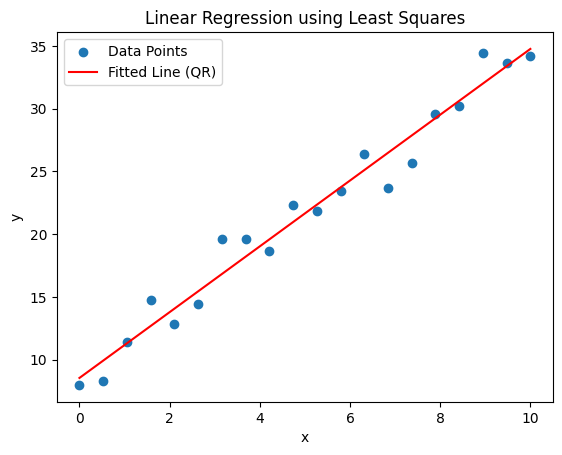

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data
np.random.seed(42)
n = 20  # Number of data points
x = np.linspace(0, 10, n)
y = 3 * x + 7 + np.random.normal(0, 2, n)  # y = 3x + 7 + noise

# Create the design matrix A
A = np.vstack([np.ones(n), x]).T  # Adding the intercept term

# Solve using the normal equations: (A^T A) β = A^T y
beta_normal_eq = np.linalg.inv(A.T @ A) @ A.T @ y
print("Coefficients (Normal Equations):", beta_normal_eq)

# Solve using QR decomposition
Q, R = np.linalg.qr(A)
beta_qr = np.linalg.inv(R) @ Q.T @ y
print("Coefficients (QR Decomposition):", beta_qr)

# Plot the data points and the fitted line
plt.scatter(x, y, label="Data Points")
plt.plot(x, A @ beta_qr, color="red", label="Fitted Line (QR)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression using Least Squares")
plt.show()


# **1.4 Principal Component Analysis**  
Principal Component Analysis (PCA) is widely used for **dimensionality reduction**, transforming high-dimensional data into a lower-dimensional space while preserving as much variance as possible. This is achieved through **Singular Value Decomposition (SVD)**.

### **1.4.1 Singular Value Decomposition (SVD)**  
For an $m \times n$ matrix $A$, the **singular values** are derived from the eigenvalues of $A^T A$. The eigenvalues $\lambda_1, \lambda_2, ..., \lambda_n$ are nonnegative, and the singular values are:

$$ \sigma_i = \sqrt{\lambda_i}, \quad 1 \leq i \leq n $$  

The **Singular Value Decomposition** expresses $A$ as:

$$ A = U \Sigma V^T $$  

where:
- $U$ is an $m \times m$ **orthogonal** matrix (left singular vectors),
- $\Sigma$ is an $m \times n$ **diagonal** matrix of singular values,
- $V$ is an $n \times n$ **orthogonal** matrix (right singular vectors).

### **1.4.2 Low-Rank Matrix Approximation**  
A matrix $A$ can be approximated using only the first $k$ singular values:

$$ A_k = \sum_{j=1}^{k} \sigma_j u_j v_j^T $$  

This gives the **best rank-$k$ approximation** of $A$ in terms of the **induced 2-norm**:

$$ \| A - A_k \|_2 = \sigma_{k+1} $$  

This result is fundamental for **dimensionality reduction** techniques.

### **1.4.3 Principal Component Analysis (PCA)**  

#### **Covariance Matrix**  
Given a dataset with $p$ features and $N$ observations, let:

$$ X = [X_1, X_2, ..., X_N] $$  

be the data matrix. The **sample mean** is:

$$ M = \frac{1}{N} \sum_{i=1}^{N} X_i $$  

To center the data (mean deviation form):

$$ B = [X_1 - M, X_2 - M, ..., X_N - M] $$  

The **covariance matrix** is then:

$$ S = \frac{1}{N - 1} B B^T $$  

Since $S$ is **symmetric and positive semi-definite**, it can be diagonalized:

$$ S = V \, \text{diag}(\lambda_1, ..., \lambda_p) V^T $$  

where $\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_p$ are the **eigenvalues** of $S$.

#### **Principal Components**  
PCA finds $k$ orthonormal vectors $\{v_1, ..., v_k\}$ (principal components) that maximize:

$$ \frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{k} \langle X_i, v_j \rangle^2 $$  

The **principal components** are the **top $k$ eigenvectors** of $S$, corresponding to the largest eigenvalues.

The transformed data is:

$$ Y = V^T X $$  

where each principal component $y_i$ is:

$$ y_i = v_1^T x_1 + v_2^T x_2 + ... + v_p^T x_p $$  

#### **Total Variance and Explained Variance**  
The **total variance** in the data is:

$$ \text{Total Variance} = \text{tr}(S) = \sum_{j=1}^{p} \lambda_j $$  

The fraction of variance explained by the first $k$ components is:

$$ \frac{\sum_{j=1}^{k} \lambda_j}{\sum_{j=1}^{p} \lambda_j} $$  

which measures how much information is retained when using the first $k$ components.


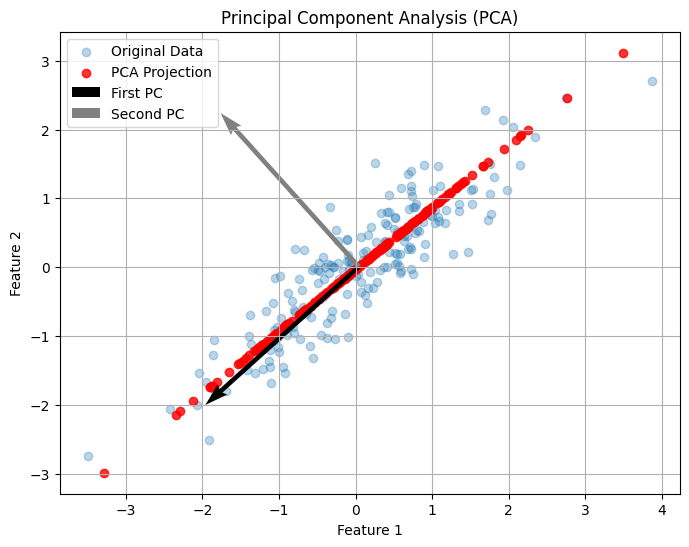

Explained Variance Ratio: [0.94695773 0.05304227]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic dataset (2D points)
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T  # 200 points in 2D

# Center the data (mean subtraction)
X_centered = X - np.mean(X, axis=0)

# Compute Covariance Matrix
cov_matrix = np.cov(X_centered.T)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(cov_matrix)

# Principal components
principal_components = Vt.T

# Project data onto the first principal component
X_pca = X_centered @ principal_components[:, 0]

# Reconstruct data using only the first principal component
X_reconstructed = np.outer(X_pca, principal_components[:, 0]) + np.mean(X, axis=0)

# Plot the original data and principal components
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="Original Data")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], alpha=0.8, color='red', label="PCA Projection")

# Draw principal components
mean = np.mean(X, axis=0)
plt.quiver(mean[0], mean[1], principal_components[0, 0], principal_components[1, 0], scale=3, color='black', label="First PC")
plt.quiver(mean[0], mean[1], principal_components[0, 1], principal_components[1, 1], scale=3, color='gray', label="Second PC")

plt.legend()
plt.title("Principal Component Analysis (PCA)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

# Variance explained
explained_variance = S / np.sum(S)
print("Explained Variance Ratio:", explained_variance)
